In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import scipy.io.wavfile as wav

In [28]:
def plot_mag_spectrum(Xmag):
    plt.figure(figsize=(20,5))
    n = np.arange(0, len(Xmag))
    plt.plot(n, Xmag)
    
srate, x = wav.read('star_wars_sine.wav')
ipd.Audio(x, rate = srate)

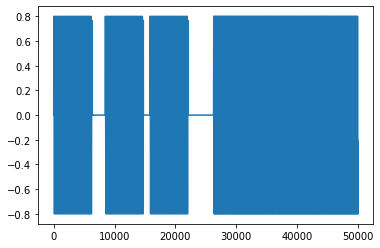

In [29]:
# convert so that range is from -1.0 to 1.0
if (x.dtype == 'int16'): 
    x = x / float(2 ** (16-1))

plt.figure()
plt.plot(x[0:50000])


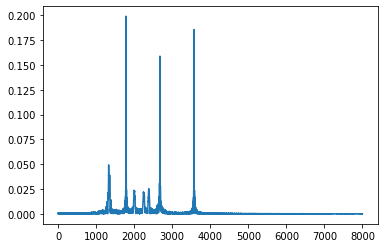

In [30]:
# The information about the amplitude can be obtained from the magnitude spectrum while the temporal information 
# can be obtained from the phase spectrum

N = len(x)
X = np.fft.fft(x)
Xmag = 2*np.abs(X)/N
plt.plot(Xmag[0:8000])

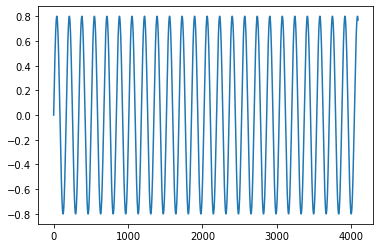

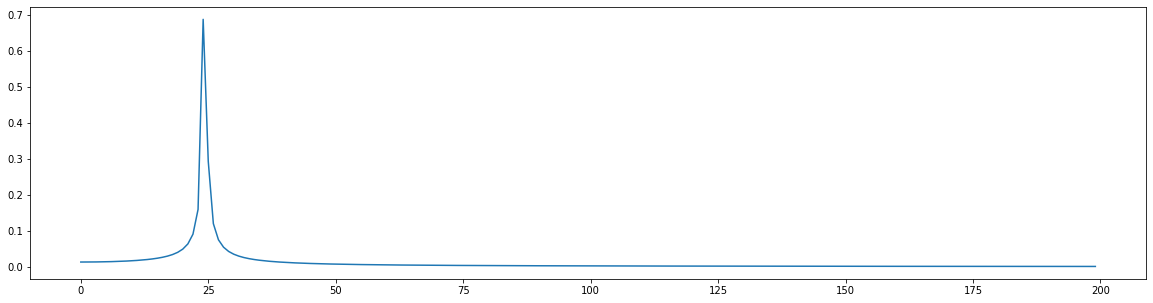

In [32]:
# Short Time Fourier Transform (STFT)

window_size = 4096
frame_index = 0
sx = x[frame_index*window_size : (frame_index + 1)*window_size]
SX = np.fft.fft(sx)
SXmag = 2*np.abs(SX)/len(sx)
plt.figure()
plt.plot(sx)
plot_mag_spectrum(SXmag[0:200])

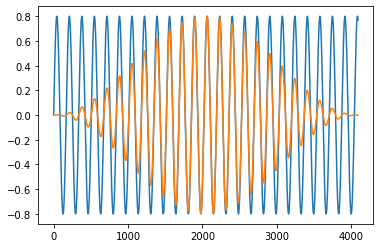

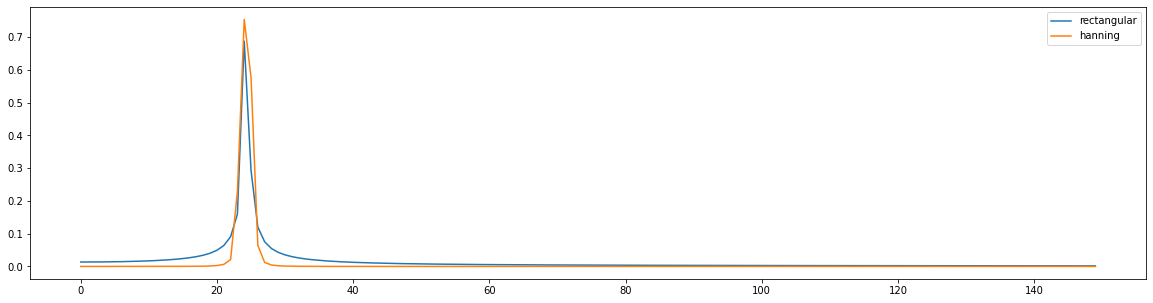

In [34]:
# Windowing

def plot_mag_spectrums(Xmag, wXmag): 
    plt.figure(figsize=(20,5))
    n = np.arange(0,len(Xmag))
    plt.plot(n,Xmag)
    plt.plot(n,wXmag)
    plt.legend(['rectangular', 'hanning'])


window_size = 4096
frame_index = 0
sx = x[frame_index * window_size: (frame_index+1)*window_size]
wx = np.hanning(window_size)
wsx = np.multiply(sx,wx)
plt.figure()
plt.plot(sx)
plt.plot(wsx)
Xmag  = 2 * np.abs(np.fft.fft(sx)) /len(sx)
wXmag = 2 * np.abs(np.fft.fft(wsx)) / len(wsx)
plot_mag_spectrums(Xmag[0:150], 2 * wXmag[0:150])

In [ ]:
# When the sinusoid falls between 2 DFT bins, a spread of energy occurs. This spread of energy can be minimized using
# windowing method. Different types of windows have different traits and there is a tradeoff to decide whic window 
# is to be used. Tradeoff is between the width of the main lobe and the height of the side lobes